In [1]:
import pandas as pd
from DataPrep import preprocess
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Hein\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
genres = ['rap', 'rock', 'pop', 'rb', 'country']
# genres = ['rap', 'rock', 'pop']
limit = '1000'
df = pd.read_csv(f'data/song_lyrics_reduced_{"_".join(genres)}_{limit}.csv')

In [3]:
def group_genres(group, df: pd.DataFrame):
    name = '/'.join(group)
    old_size = len(df)
    # Replace all labels of the genre in the group by a new group name
    df = df.replace(group, name)
    # Now reduce the amount of songs in the new group genre to rebalance the dataset
    # Only consider removing non-grouped genres
    is_not_group_genre = df['tag'] != name
    # Only keep 1 out of every n=len(group) songs in the new group genre
    is_nth_song = np.mod(np.array(df.index), len(group)) == 0
    # Logical or to get indices for which songs to keep
    indices = np.logical_or(is_not_group_genre, is_nth_song)
    df = df[indices]
    print(f'Succesfully grouped {", ".join(group)} to {name}. (Size reduced from {old_size} to {len(df)})')
    return df

In [4]:
group = ['rock', 'pop']
df = group_genres(group, df)

Succesfully grouped rock, pop to rock/pop. (Size reduced from 5000 to 4000)


In [5]:
print(f'Genres: {", ".join(df["tag"].unique())}')
for genre in df['tag'].unique():
    print(f'Size {genre}: {len(df[df["tag"] == genre])}')

Genres: rap, rock/pop, rb, country
Size rap: 1000
Size rock/pop: 1000
Size rb: 1000
Size country: 1000


In [6]:
documents = preprocess(df['lyrics'])
documents = [' '.join(doc) for doc in documents]

Preprocessing data
Removing notes in [brackets]
Removing punctuation
Normalizing
Tokenizing
Removing stopwords
Stemming
Finished data preparation!


In [7]:
X_train, X_test, y_train, y_test = train_test_split(documents, df[['tag', 'title']], test_size=0.1, random_state = 42)
y_titles_train, y_titles_test = y_train['title'], y_test['title']
y_train, y_test = y_train['tag'], y_test['tag']

In [8]:
def vectorize(X_train):
    vectorizer = CountVectorizer()
    dt_matrix = vectorizer.fit_transform(X_train).toarray()
    return vectorizer, dt_matrix

In [9]:
vectorizer, dt_matrix = vectorize(X_train)

In [10]:
model = MultinomialNB()
model.fit(dt_matrix, y_train)

,alpha,1.0
,force_alpha,True
,fit_prior,True
,class_prior,None


In [11]:
dt_matrix_test = vectorizer.transform(X_test)
y_pred = model.predict(dt_matrix_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy*100}%')
f1 = f1_score(y_test, y_pred, average='weighted')
print(f'F1 score: {f1*100}%')

Accuracy: 68.75%
F1 score: 67.29963376371978%


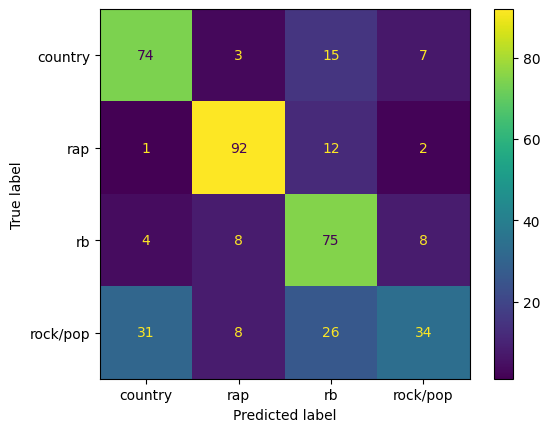

In [12]:
cf_matrix = confusion_matrix(y_test, y_pred)
display = ConfusionMatrixDisplay(cf_matrix, display_labels=model.classes_)
display.plot()
plt.show()

In [13]:
y_t = list(y_test)
for i in range(len(X_test)):
    if y_pred[i] != y_t[i]:
        print(f'{y_pred[i]} should be {y_t[i]} - "{list(y_titles_test)[i]}"')

rap should be rb - "Maggot Brain"
rb should be rap - "Already Home"
rb should be rock/pop - "Dont Cry Your Heart Out"
country should be rock/pop - "In My Eyes"
rap should be rock/pop - "KRS-One"
rb should be country - "Somebodys Heartbreak"
rb should be rap - "Show Me a Good Time"
rb should be rock/pop - "Too Fake"
rb should be rock/pop - "Single Ladies Put a Ring on It"
rap should be country - "Back When"
rock/pop should be rb - "Love"
country should be rock/pop - "Shangri-La"
rock/pop should be country - "Hey Now"
rap should be rb - "Roller Rink"
rb should be rock/pop - "Like a Bunny"
rb should be country - "Let Me Love You"
rap should be country - "Prodigal Son"
rb should be rock/pop - "The Boys Clinton Sparks  Disco Fries Remix"
country should be rock/pop - "Cool Down Apollo"
rb should be rock/pop - "Somebody That I Used to Know"
country should be rock/pop - "At the Bottom of Everything"
rap should be rb - "Dollar Bill"
rb should be rock/pop - "Baby"
rb should be rock/pop - "Vegas 